# Capstone Webscraping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

(Please insert the background here )

## Requesting the Data and Creating a BeautifulSoup

Let's start by requesting the webpage using the `get` method from the `requests` library.

In [1]:
import requests

url_get = requests.get('https://www.boxofficemojo.com/year/world/')

To visualize what exactly you get from the `request.get`, we can use `.content` so see what we exactly get (HTML content), in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!doctype html><html class="a-no-js" data-19ax5a9jf="dingo"><head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<script type=\'text/javascript\'>\nwindow.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's create a BeautifulSoup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information


To extract the desired information, we need to find the right key using the .find() method. We can explore the HTML structure using .prettify().

*(please change this markdown with your explanation)*
div class="a-section imdb-scroll-table-inner"



In [4]:
table = soup.find('div', attrs={'class':'a-section imdb-scroll-table-inner'}).find('table')
print(table.prettify()[1:500])

table class="a-bordered a-horizontal-stripes a-size-base a-span12 mojo-body-table mojo-table-annotated">
 <tr>
  <th class="a-text-right mojo-field-type-rank mojo-sort-column mojo-sortable-column a-nowrap">
   <a class="a-link-normal a-nowrap" href="?sort=rank&amp;ref_=bo_ydw__resort#table" title="Rank">
    <span class="a-color-state">
     Rank
    </span>
    <span class="a-letter-space">
    </span>
    <span class="icon aok-relative">
     <i class="a-icon a-icon-collapse" role="presentati


Next, we need to find the row length.

In [5]:
content = table.find_all('tr')[0:]
row_length = len(content)
row_length

201

In [6]:
content[0].find_all('td')

[]

In [7]:
content[4].find_all('td')[6].text

'41.4%'

Do the scrapping process here (please change this markdown with your explanation). 

> You can use a for loop to perform the scraping process in various ways depending on the HTML structure of the website you want to scrap and the information you want to retrieve.

In [8]:
temp = []  # Initiating a tuple

for i in range(1, row_length):

    # Ranking Movie
    rank = content[i].find_all('td')[0].text

    # Release Group Title
    title = content[i].find_all('td')[1].text

    # Worldwide
    world = content[i].find_all('td')[2].text
    world = world.strip()

    # Domestic
    domestic = content[i].find_all('td')[3].text
    domestic = domestic.strip()

    # % Domestic
    p_domestic = content[i].find_all('td')[4].text
    p_domestic = p_domestic.strip()

    # Foreign
    foreign = content[i].find_all('td')[5].text
    foreign = foreign.strip()

    # % Foreign
    p_foreign = content[i].find_all('td')[6].text
    p_foreign = p_foreign.strip()

    temp.append((rank, title, world, domestic, p_domestic, foreign, p_foreign))

temp

[('1',
  'Dune: Part Two',
  '$697,501,409',
  '$277,501,409',
  '39.8%',
  '$420,000,000',
  '60.2%'),
 ('2',
  'Godzilla x Kong: The New Empire',
  '$488,966,084',
  '$173,866,084',
  '35.6%',
  '$315,100,000',
  '64.4%'),
 ('3',
  'Kung Fu Panda 4',
  '$482,533,351',
  '$181,131,595',
  '37.5%',
  '$301,401,756',
  '62.5%'),
 ('4',
  'Ghostbusters: Frozen Empire',
  '$177,289,193',
  '$103,877,749',
  '58.6%',
  '$73,411,444',
  '41.4%'),
 ('5',
  'Bob Marley: One Love',
  '$177,183,739',
  '$96,883,739',
  '54.7%',
  '$80,300,000',
  '45.3%'),
 ('6',
  'The Beekeeper',
  '$152,720,535',
  '$66,220,535',
  '43.4%',
  '$86,500,000',
  '56.6%'),
 ('7',
  'Mean Girls',
  '$104,404,248',
  '$72,404,248',
  '69.3%',
  '$32,000,000',
  '30.7%'),
 ('8',
  'Madame Web',
  '$100,298,817',
  '$43,817,106',
  '43.7%',
  '$56,481,711',
  '56.3%'),
 ('9', 'Argylle', '$96,170,413', '$45,207,275', '47%', '$50,963,138', '53%'),
 ('10', 'Exhuma', '$95,019,488', '$2,148,446', '2.3%', '$92,871,042', '

Note: You can customize the code inside the loop according to your needs to extract the desired information from the website you scrap. Make sure to check and adjust the code well to suit the HTML structure and information you want to retrieve.

## Creating data frame & Data wrangling

Once we have extracted the data, we can put it into a dataframe.

In [9]:
import pandas as pd
import numpy as np

df = pd.DataFrame(temp, columns = ('Rank','Title','Worldwide','Domestic','p_Domestic','Foreign','p_Foreign'))
df.head(10)

,Rank,Title,Worldwide,Domestic,p_Domestic,Foreign,p_Foreign
0,1,Dune: Part Two,"$697,501,409","$277,501,409",39.8%,"$420,000,000",60.2%
1,2,Godzilla x Kong: The New Empire,"$488,966,084","$173,866,084",35.6%,"$315,100,000",64.4%
2,3,Kung Fu Panda 4,"$482,533,351","$181,131,595",37.5%,"$301,401,756",62.5%
3,4,Ghostbusters: Frozen Empire,"$177,289,193","$103,877,749",58.6%,"$73,411,444",41.4%
4,5,Bob Marley: One Love,"$177,183,739","$96,883,739",54.7%,"$80,300,000",45.3%
5,6,The Beekeeper,"$152,720,535","$66,220,535",43.4%,"$86,500,000",56.6%
6,7,Mean Girls,"$104,404,248","$72,404,248",69.3%,"$32,000,000",30.7%
7,8,Madame Web,"$100,298,817","$43,817,106",43.7%,"$56,481,711",56.3%
8,9,Argylle,"$96,170,413","$45,207,275",47%,"$50,963,138",53%
9,10,Exhuma,"$95,019,488","$2,148,446",2.3%,"$92,871,042",97.7%


### Data Cleansing


1. ubah tipe data
2. limit jadi 10 movie teratas
3. replace (nanti liat) [.str.replace]
4. tabel yang dibutuhkan
    - top 10 + worldwide  = `top10`
    - domestic > foreign  + selisih = `domoverfor`
    - hanya domestic = `moviedomestic`
    - hanya foreign = `movieforeign`


In [10]:

df.dtypes

Rank          object
Title         object
Worldwide     object
Domestic      object
p_Domestic    object
Foreign       object
p_Foreign     object
dtype: object

In [11]:
df.Rank = df.Rank.astype('int64')
df.Worldwide = df.Worldwide.str.replace('$', '').str.replace(',', '').astype('int64')
df.Domestic = df.Domestic.str.replace('$', '').str.replace(',', '').str.replace('-','0').astype('int64')
df.Foreign = df.Foreign.str.replace('$', '').str.replace(',', '').str.replace('-','0').astype('int64')
df.p_Domestic = df.p_Domestic.str.replace('%','').str.replace('-','0').astype('float64')
df.p_Foreign = df.p_Foreign.str.replace('%','').str.replace('-','0').astype('float64')
df.dtypes

Rank            int64
Title          object
Worldwide       int64
Domestic        int64
p_Domestic    float64
Foreign         int64
p_Foreign     float64
dtype: object

In [12]:
top10 = df.drop(columns= ['Domestic','p_Domestic','Foreign','p_Foreign']).head(10)
top10

,Rank,Title,Worldwide
0,1,Dune: Part Two,697501409
1,2,Godzilla x Kong: The New Empire,488966084
2,3,Kung Fu Panda 4,482533351
3,4,Ghostbusters: Frozen Empire,177289193
4,5,Bob Marley: One Love,177183739
5,6,The Beekeeper,152720535
6,7,Mean Girls,104404248
7,8,Madame Web,100298817
8,9,Argylle,96170413
9,10,Exhuma,95019488


In [13]:
top10.set_index('Title')

,Rank,Worldwide
Title,,
Dune: Part Two,1,697501409
Godzilla x Kong: The New Empire,2,488966084
Kung Fu Panda 4,3,482533351
Ghostbusters: Frozen Empire,4,177289193
Bob Marley: One Love,5,177183739
The Beekeeper,6,152720535
Mean Girls,7,104404248
Madame Web,8,100298817
Argylle,9,96170413


In [14]:
movieforeign = df[df.Domestic == 0].drop(columns = ['Worldwide', 'Domestic', 'p_Domestic', 'p_Foreign'])
movieforeign.count()

Rank       142
Title      142
Foreign    142
dtype: int64

In [20]:
top10foreign = df.sort_values('Foreign', ascending= False).drop(columns = ['Worldwide', 'Domestic', 'p_Domestic', 'p_Foreign']).head(10)
top10foreign

,Rank,Title,Foreign
0,1,Dune: Part Two,420000000
1,2,Godzilla x Kong: The New Empire,315100000
2,3,Kung Fu Panda 4,301401756
9,10,Exhuma,92871042
5,6,The Beekeeper,86500000
4,5,Bob Marley: One Love,80300000
3,4,Ghostbusters: Frozen Empire,73411444
10,11,Haikyuu!! The Dumpster Battle,64265198
7,8,Madame Web,56481711
8,9,Argylle,50963138


In [16]:
moviedomestic = df[df.Foreign == 0].drop(columns = ['Worldwide', 'Foreign', 'p_Domestic', 'p_Foreign'])
moviedomestic.count()


Rank        11
Title       11
Domestic    11
dtype: int64

In [21]:
top10domestic = df.sort_values('Domestic', ascending= False).drop(columns = ['Worldwide', 'Foreign', 'p_Domestic', 'p_Foreign']).head(10)
top10domestic

,Rank,Title,Domestic
0,1,Dune: Part Two,277501409
2,3,Kung Fu Panda 4,181131595
1,2,Godzilla x Kong: The New Empire,173866084
3,4,Ghostbusters: Frozen Empire,103877749
4,5,Bob Marley: One Love,96883739
6,7,Mean Girls,72404248
5,6,The Beekeeper,66220535
8,9,Argylle,45207275
11,12,Civil War,44884414
7,8,Madame Web,43817106


In [18]:
#domoverfor
domoverfor = df[df.Domestic > df.Foreign]
domoverfor['Difference'] = domoverfor.Domestic - domoverfor.Foreign
domoverfor

C:\Users\Albertus MPP\AppData\Local\Temp\ipykernel_8420\357955173.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  domoverfor['Difference'] = domoverfor.Domestic - domoverfor.Foreign


,Rank,Title,Worldwide,Domestic,p_Domestic,Foreign,p_Foreign,Difference
3,4,Ghostbusters: Frozen Empire,177289193,103877749,58.6,73411444,41.4,30466305
4,5,Bob Marley: One Love,177183739,96883739,54.7,80300000,45.3,16583739
6,7,Mean Girls,104404248,72404248,69.3,32000000,30.7,40404248
11,12,Civil War,60277225,44884414,74.5,15392811,25.5,29491603
12,13,Night Swim,54075969,32494740,60.1,21581229,39.9,10913511
16,17,Imaginary,38984361,27998891,71.8,10985470,28.2,17013421
17,18,Arthur the King,31360510,24580797,78.4,6779713,21.6,17801084
18,19,Monkey Man,29716175,22570935,76.0,7145240,24.0,15425695
25,26,Immaculate,21840423,15581210,71.3,6259213,28.7,9321997
29,30,Cabrini,20147118,19402901,96.3,744217,3.7,18658684


In [19]:
domoverfor.sort_values(by="Difference", ascending=False)

,Rank,Title,Worldwide,Domestic,p_Domestic,Foreign,p_Foreign,Difference
6,7,Mean Girls,104404248,72404248,69.3,32000000,30.7,40404248
3,4,Ghostbusters: Frozen Empire,177289193,103877749,58.6,73411444,41.4,30466305
11,12,Civil War,60277225,44884414,74.5,15392811,25.5,29491603
30,31,Ordinary Angels,19454580,19174421,98.6,280159,1.4,18894262
29,30,Cabrini,20147118,19402901,96.3,744217,3.7,18658684
17,18,Arthur the King,31360510,24580797,78.4,6779713,21.6,17801084
16,17,Imaginary,38984361,27998891,71.8,10985470,28.2,17013421
4,5,Bob Marley: One Love,177183739,96883739,54.7,80300000,45.3,16583739
18,19,Monkey Man,29716175,22570935,76.0,7145240,24.0,15425695
36,37,The Chosen: S4 Episodes 1-3,14799620,14409169,97.4,390451,2.6,14018718


### Data Visualization

visualisasi :
    
    - bar chart perbandingan worldwide
    - bar chart potongan worldwide gabungan dari domestic + foreign (ntar)
    - interesting facts untuk conclusion
    - foreign vs domestic 
        - p_domestic > p_foreign mana aja
        - selisihnya berapa
        - domestic doang
        - foreign doang
        

In [38]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt



<Axes: ylabel='Title'>

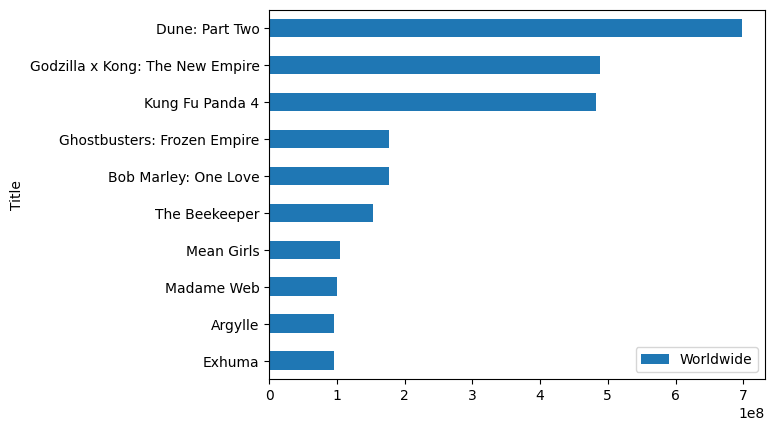

In [40]:
top10plot = top10.drop(columns = 'Rank').set_index('Title').sort_values(by='Worldwide',ascending=True).plot.barh()
top10plot



<Axes: ylabel='Title'>

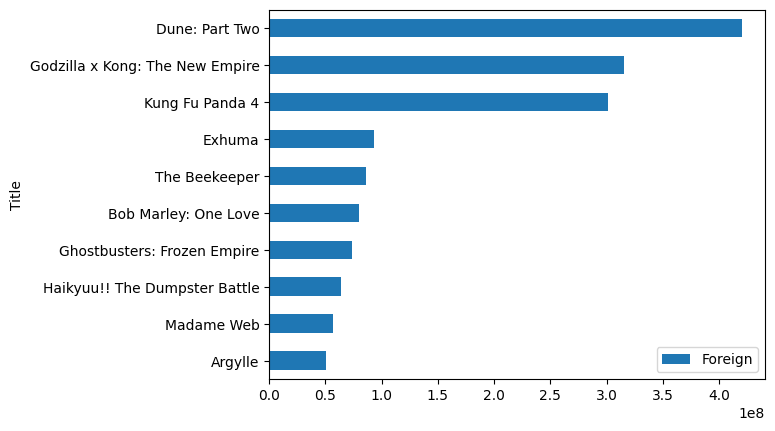

In [41]:
top10foreignplot = top10foreign.sort_values(by= 'Foreign', ascending=True).drop(columns = 'Rank').set_index('Title').plot.barh()
top10foreignplot

<Axes: ylabel='Title'>

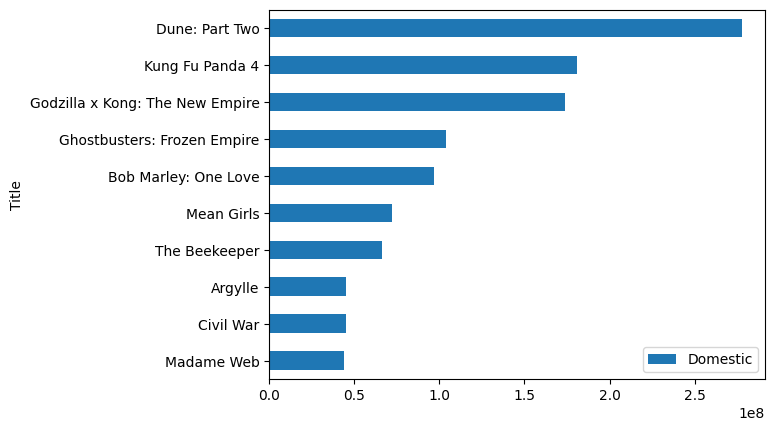

In [42]:
top10domesticplot = top10domestic.sort_values(by= 'Domestic', ascending=True).drop(columns = 'Rank').set_index('Title').plot.barh()
top10domesticplot

<Axes: ylabel='Title'>

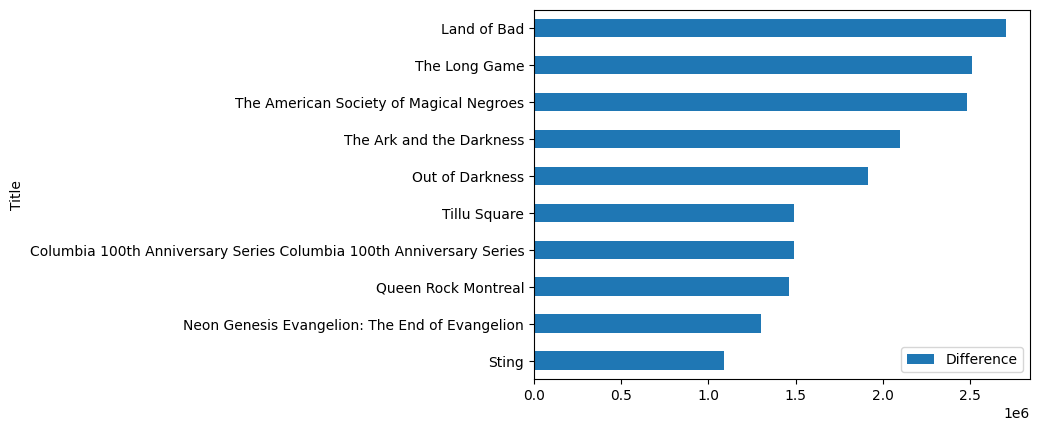

In [43]:
domoverforplot = domoverfor.drop( columns=['Worldwide','Foreign','Domestic','p_Domestic', 'p_Foreign', 'Rank'] ).sort_values(by="Difference", ascending=True).head(10).set_index('Title').plot.barh()
domoverforplot

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Change the title of the dashboard in `index.html`

## Finishing This Notebook with Your Analysis and Conclusion


## Analysis

from the top10 plot, we find that *Dune:Part Two* is the most successful worldwide. as it turns out, it achieves it's title as the most successful not only by topping the sales from the Domestic market, but also the Foreign market. 

as the foreign market is a big market, we want to see which titles **sold more domestically than to out to foreign market** and h**ad the biggest difference compared to their sales to the foreign market**. we see some recurring titles from the worldwide top 10 list, which are : *'Ghostbusters: Frozen Empire', 'Bob Marley : One Love', and 'Mean Girls'*

### Extra Challange

This will be not included to the scoring. 

- You can create additional visualization/analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.